RandomForestClassifier and KNeighborsClassifier Using Plurality Prediction

Accuracy: 0.555045871559633
Precision: 0.4342194886453259
Recall: 0.4194791185082447
F1 Score: 0.42229066565100193
AUC: 0.9483042871512789
V Score: 0.3018408864869107
Confusion Matrix:
[[78 12 12  1]
 [24 22  6  2]
 [15 16 20  3]
 [ 4  2  0  1]]


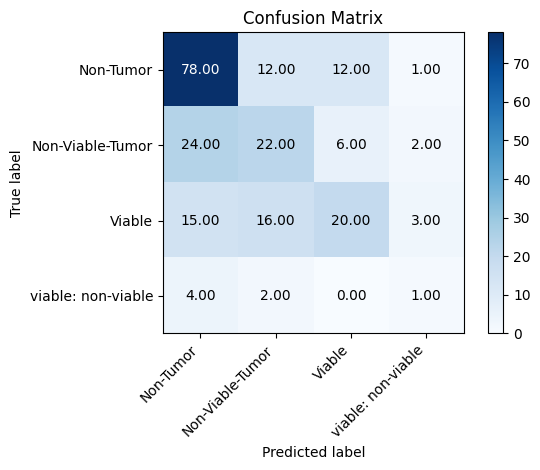

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\dataset_NoPCA.csv'
df = pd.read_csv(dataset_path)

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the first classifier
clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(X_train, y_train)

# Train the second classifier
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train, y_train)

# Make predictions using both classifiers
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)

# Combine predictions using plurality voting
combined_pred = [max(set([pred1[i], pred2[i]]), key=list([pred1[i], pred2[i]]).count) for i in range(len(pred1))]

# Encode the combined predictions and test labels to numeric values
label_encoder = LabelEncoder()
combined_pred_encoded = label_encoder.fit_transform(combined_pred)
y_test_encoded = label_encoder.transform(y_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, combined_pred_encoded)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_encoded, combined_pred_encoded, average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test_encoded, combined_pred_encoded, average='macro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test_encoded, combined_pred_encoded, average='macro')
print("F1 Score:", f1)

# Calculate AUC using One-vs-Rest (OvR) strategy
auc = roc_auc_score(y_test_encoded, clf1.predict_proba(X_test), multi_class='ovr')
print("AUC:", auc)

# Calculate V score (also known as the Matthews correlation coefficient)
v_score = matthews_corrcoef(y_test_encoded, combined_pred_encoded)
print("V Score:", v_score)

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, combined_pred_encoded)
print("Confusion Matrix:")
print(cm)

# Plotting the histogram
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
classes = label_encoder.classes_
tick_marks = np.arange(len(classes))
ax.set(xticks=tick_marks, yticks=tick_marks, xticklabels=classes, yticklabels=classes,
       xlabel='Predicted label', ylabel='True label', title='Confusion Matrix')
plt.xticks(rotation=45, ha='right')
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()